In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas 
import plotly.express as px
import pycountry

## Exercise 1
a) Load top hits data from file songs_normalize.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [110]:
#a)
#Your code:
df = pd.read_csv('./ds_salaries.csv')
df.head()

#Hint: read_csv(), head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [111]:
#b) 
print(df.columns)
ds_categorical_df = df[["experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", "company_location", "company_size"]]
ds_numerical_df = df[["work_year", "salary", "salary_in_usd", "remote_ratio"]]



Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [112]:
#c)
#Your code:
ds_numerical_df.describe()


#Hint: Function describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [113]:
print(df.isnull().sum()) 
# missing values check

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


## Exercise 2
Using scatter plot:  
a) Show the relation of acousticness and year.  
b) Check how duration is influenced by a year the song was released. Find other variables correlated with year.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

Text(0, 0.5, 'salary_in_usd')

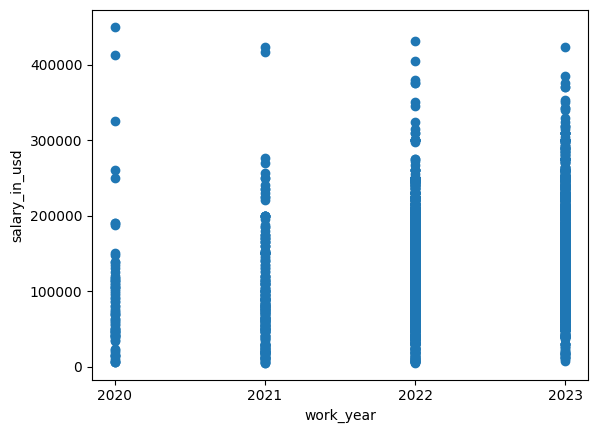

In [114]:
#a)
#Your code:

plt.scatter(df['work_year'], df['salary_in_usd'])
plt.xticks(ticks=[2020, 2021, 2022, 2023])
plt.xlabel("work_year")
plt.ylabel("salary_in_usd")

#Hint plt.scatter

Text(0, 0.5, 'experience_level')

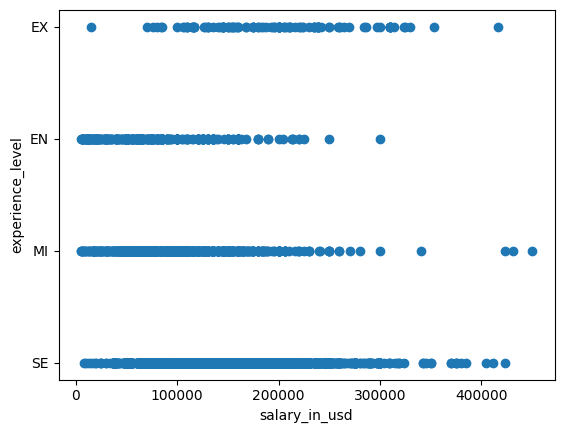

In [115]:
#b)
#Your code:

plt.scatter(df['salary_in_usd'], df['experience_level'])
plt.xlabel('salary_in_usd')
plt.ylabel("experience_level")
# box_df = df[['salary', 'experience_level']]
# box_df.boxplot(by='salary')
# plt.figure(figsize=(20, 16))


<Figure size 2000x1600 with 0 Axes>

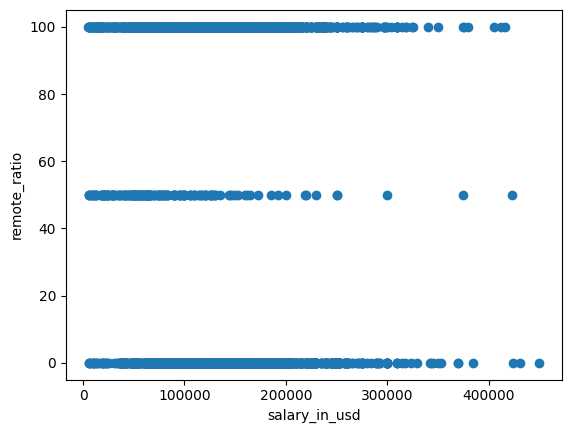

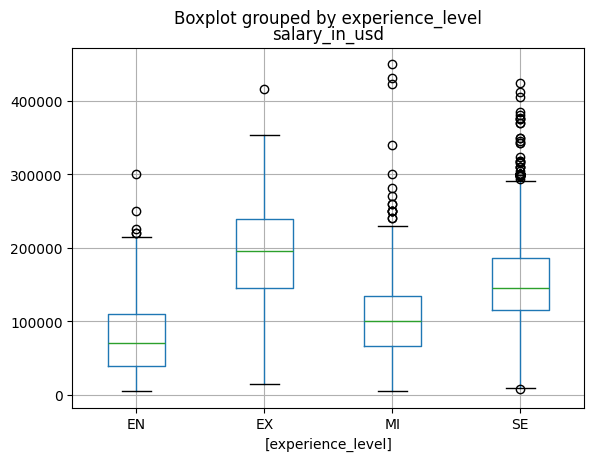

<Figure size 2000x1600 with 0 Axes>

In [116]:
#b)
#Your code:

plt.scatter(df['salary_in_usd'], df['remote_ratio'])
plt.xlabel('salary_in_usd')
plt.ylabel('remote_ratio')
# box_df = df[['salary_in_usd', 'experience_level']]
# box_df.boxplot(by='experience_level')
# plt.figure(figsize=(20, 16))

In [117]:
avg_salary_per_job = df.groupby(by='job_title')['salary'].mean().reset_index(name='avg')
avg_salary_per_job.nlargest(5, 'avg')

,job_title,avg
60,Head of Machine Learning,6.000000e+06
82,Principal Data Architect,3.000000e+06
65,Lead Machine Learning Engineer,2.548667e+06
64,Lead Data Scientist,9.284853e+05
28,Data Analytics Lead,9.225000e+05


Text(0, 0.5, 'salary_in_')

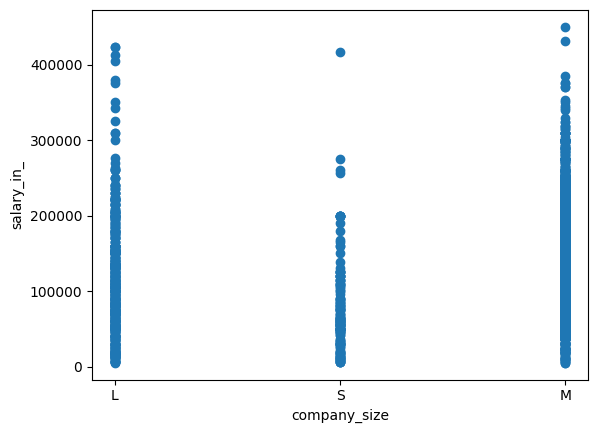

In [118]:
#c)
#Your code:
plt.scatter(df['company_size'], df['salary_in_usd'])
plt.xlabel("company_size")
plt.ylabel("salary_in_")

/tmp/ipykernel_1629/3031916010.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Axes: >

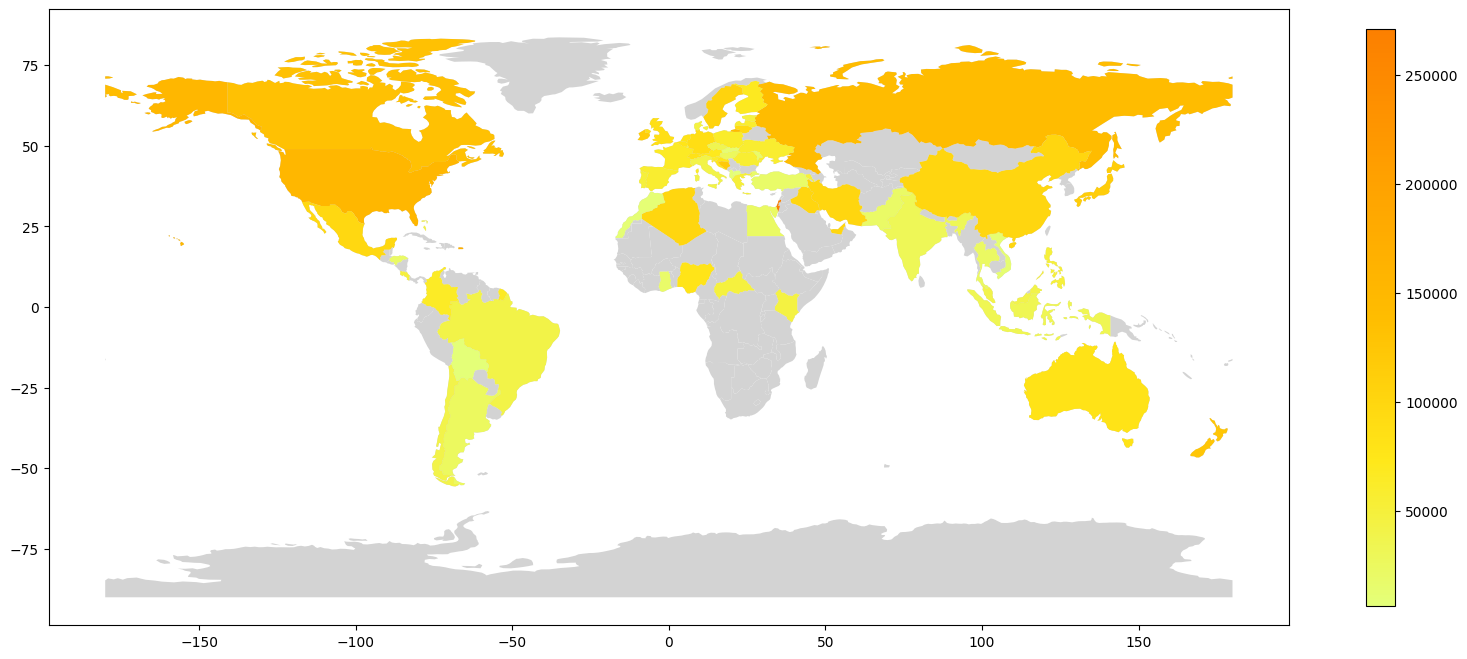

In [119]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['iso_a3', 'geometry']]
world.rename(columns={'iso_a3': 'country'}, inplace=True)

def convert_a2_to_a3(row):
    iso_a2 = row['company_location']
    country = pycountry.countries.get(alpha_2=iso_a2)
    return country.alpha_3

df['country'] = df.apply(convert_a2_to_a3, axis=1)
avg_per_country = df.groupby(by='country')['salary_in_usd'].mean().reset_index(name='avg')
merged = pd.merge(world, avg_per_country, on='country')
fig, ax = plt.subplots(figsize=(20,15))
world.plot(figsize=(20,15), color='lightgray', ax=ax)
merged.plot(column="avg", legend=True, legend_kwds={'shrink': 0.5}, cmap='Wistia', figsize=(20,15), ax=ax)

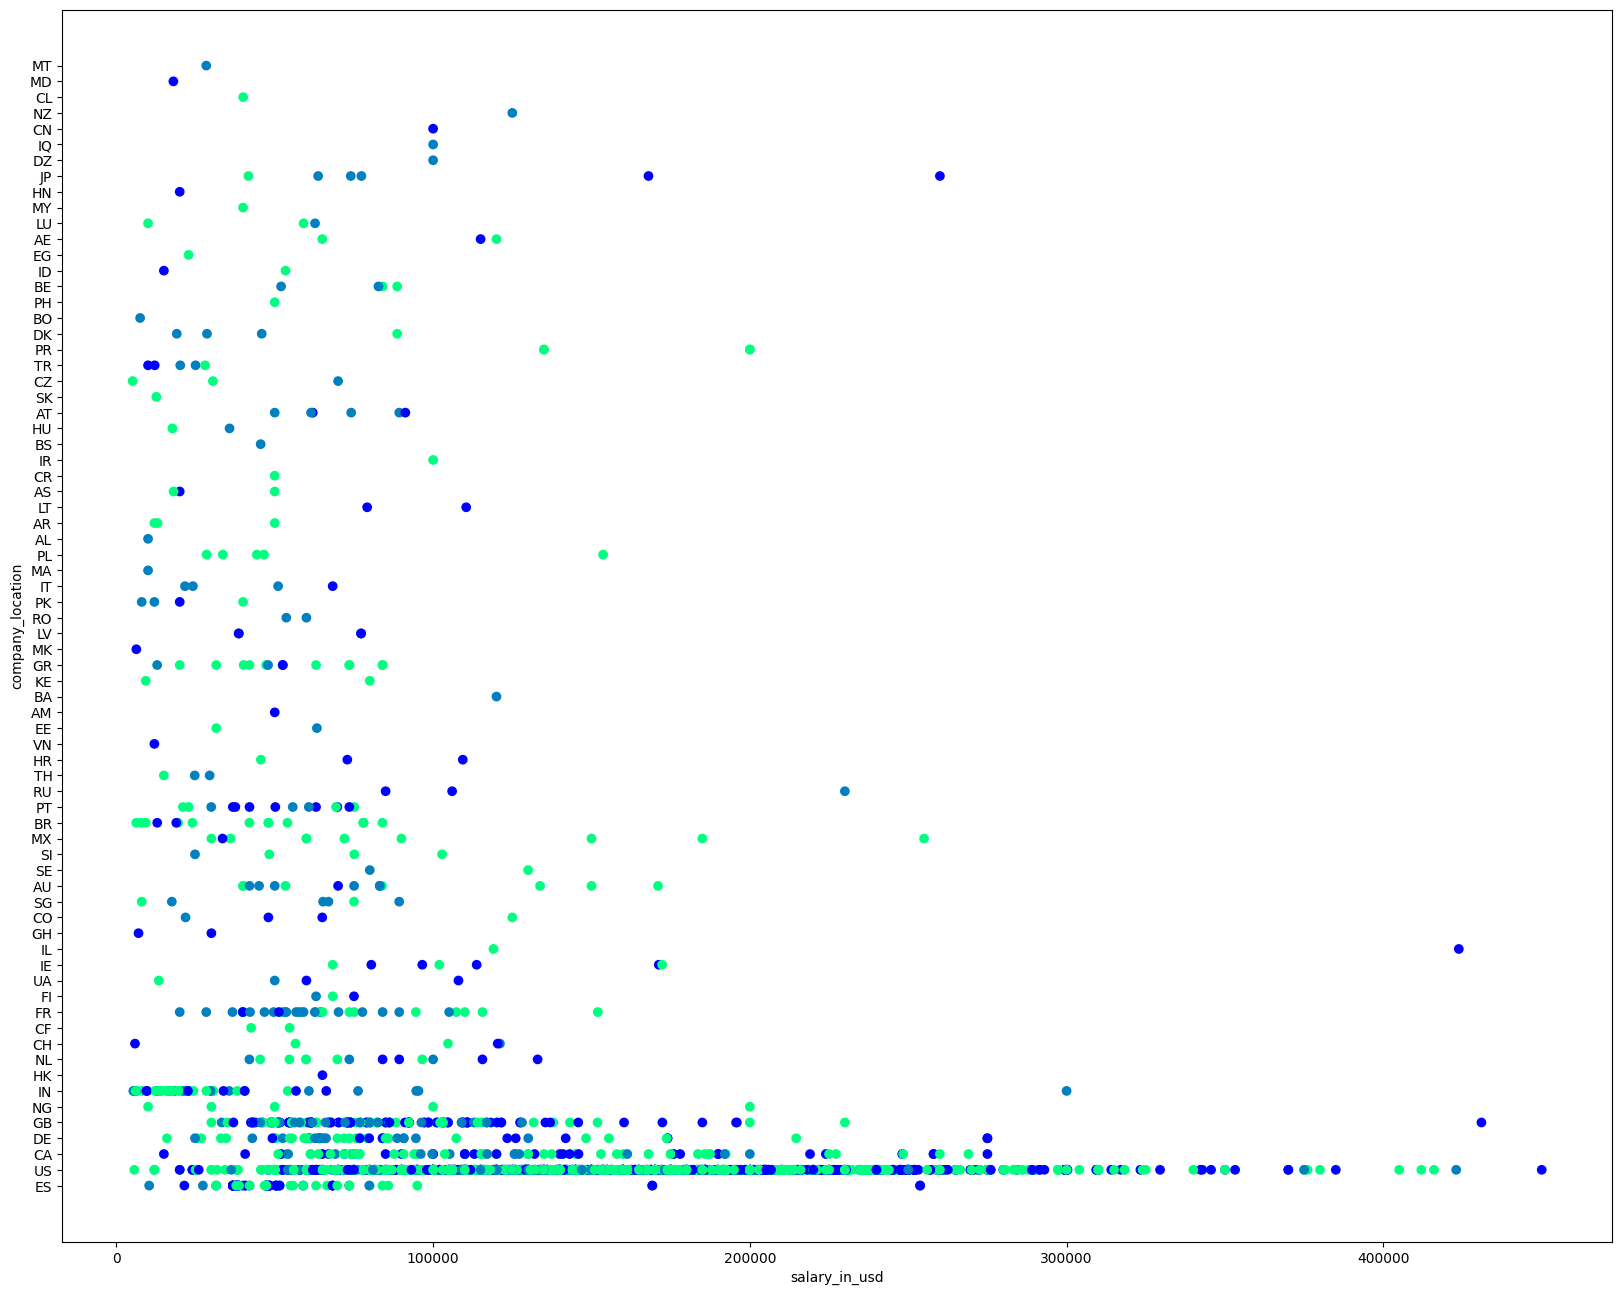

In [129]:
#Your code:

plt.figure(figsize=(20, 16))
plt.xlabel("salary_in_usd")
plt.ylabel('company_location')
plt.scatter(df['salary_in_usd'], df['company_location'], c=df['remote_ratio'], cmap='winter')

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

Text(0, 0.5, 'salary_in_usd')

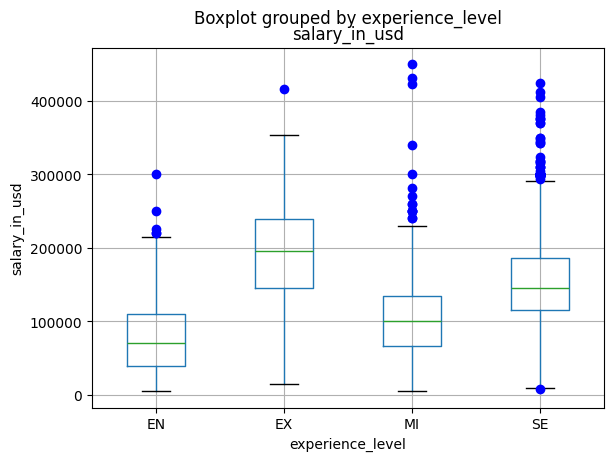

In [124]:
#a)
#Your code:
# key = sorted(df['key'].unique())
# data = [df[df['key']==key]['tempo'] for key in key]
# flierprops = dict(marker='o', markerfacecolor='b', linestyle='none', markeredgecolor='b')
# plt.boxplot(data, flierprops=flierprops)
# plt.xlabel("tempo")
# plt.ylabel("key")



# plt.scatter(df['salary_in_usd'], df['remote_ratio'])

box_df = df[['salary_in_usd', 'experience_level']]
flierprops = dict(marker='o', markerfacecolor='b', linestyle='none', markeredgecolor='b')
box_df.boxplot(by='experience_level', flierprops=flierprops)
plt.xlabel('experience_level')
plt.ylabel('salary_in_usd')


#Hint: plt.boxplot

(<Figure size 3000x2400 with 3 Axes>,
 {('SE', '100'): (0.0, 0.0, 0.6601378785592936, 0.43904442034554997),
  ('SE', '0'): (0.0,
   0.4423556786236957,
   0.6601378785592936,
   0.5369608018614641),
  ('SE', '50'): (0.0,
   0.9826277387633054,
   0.6601378785592936,
   0.017372261236694463),
  ('MI', '100'): (0.6650639869336779,
   0.0,
   0.21121263602552912,
   0.41339311422812713),
  ('MI', '0'): (0.6650639869336779,
   0.41670437250627285,
   0.21121263602552912,
   0.4886676812965323),
  ('MI', '50'): (0.6650639869336779,
   0.9086833120809509,
   0.21121263602552912,
   0.09131668791904901),
  ('EN', '100'): (0.8812027313335912,
   0.0,
   0.08396030251946503,
   0.4470198675496688),
  ('EN', '0'): (0.8812027313335912,
   0.45033112582781454,
   0.08396030251946503,
   0.34457781456953634),
  ('EN', '50'): (0.8812027313335912,
   0.7982201986754967,
   0.08396030251946503,
   0.2017798013245033),
  ('EX', '100'): (0.9700891422274405,
   0.0,
   0.029910857772559425,
   0.45311955

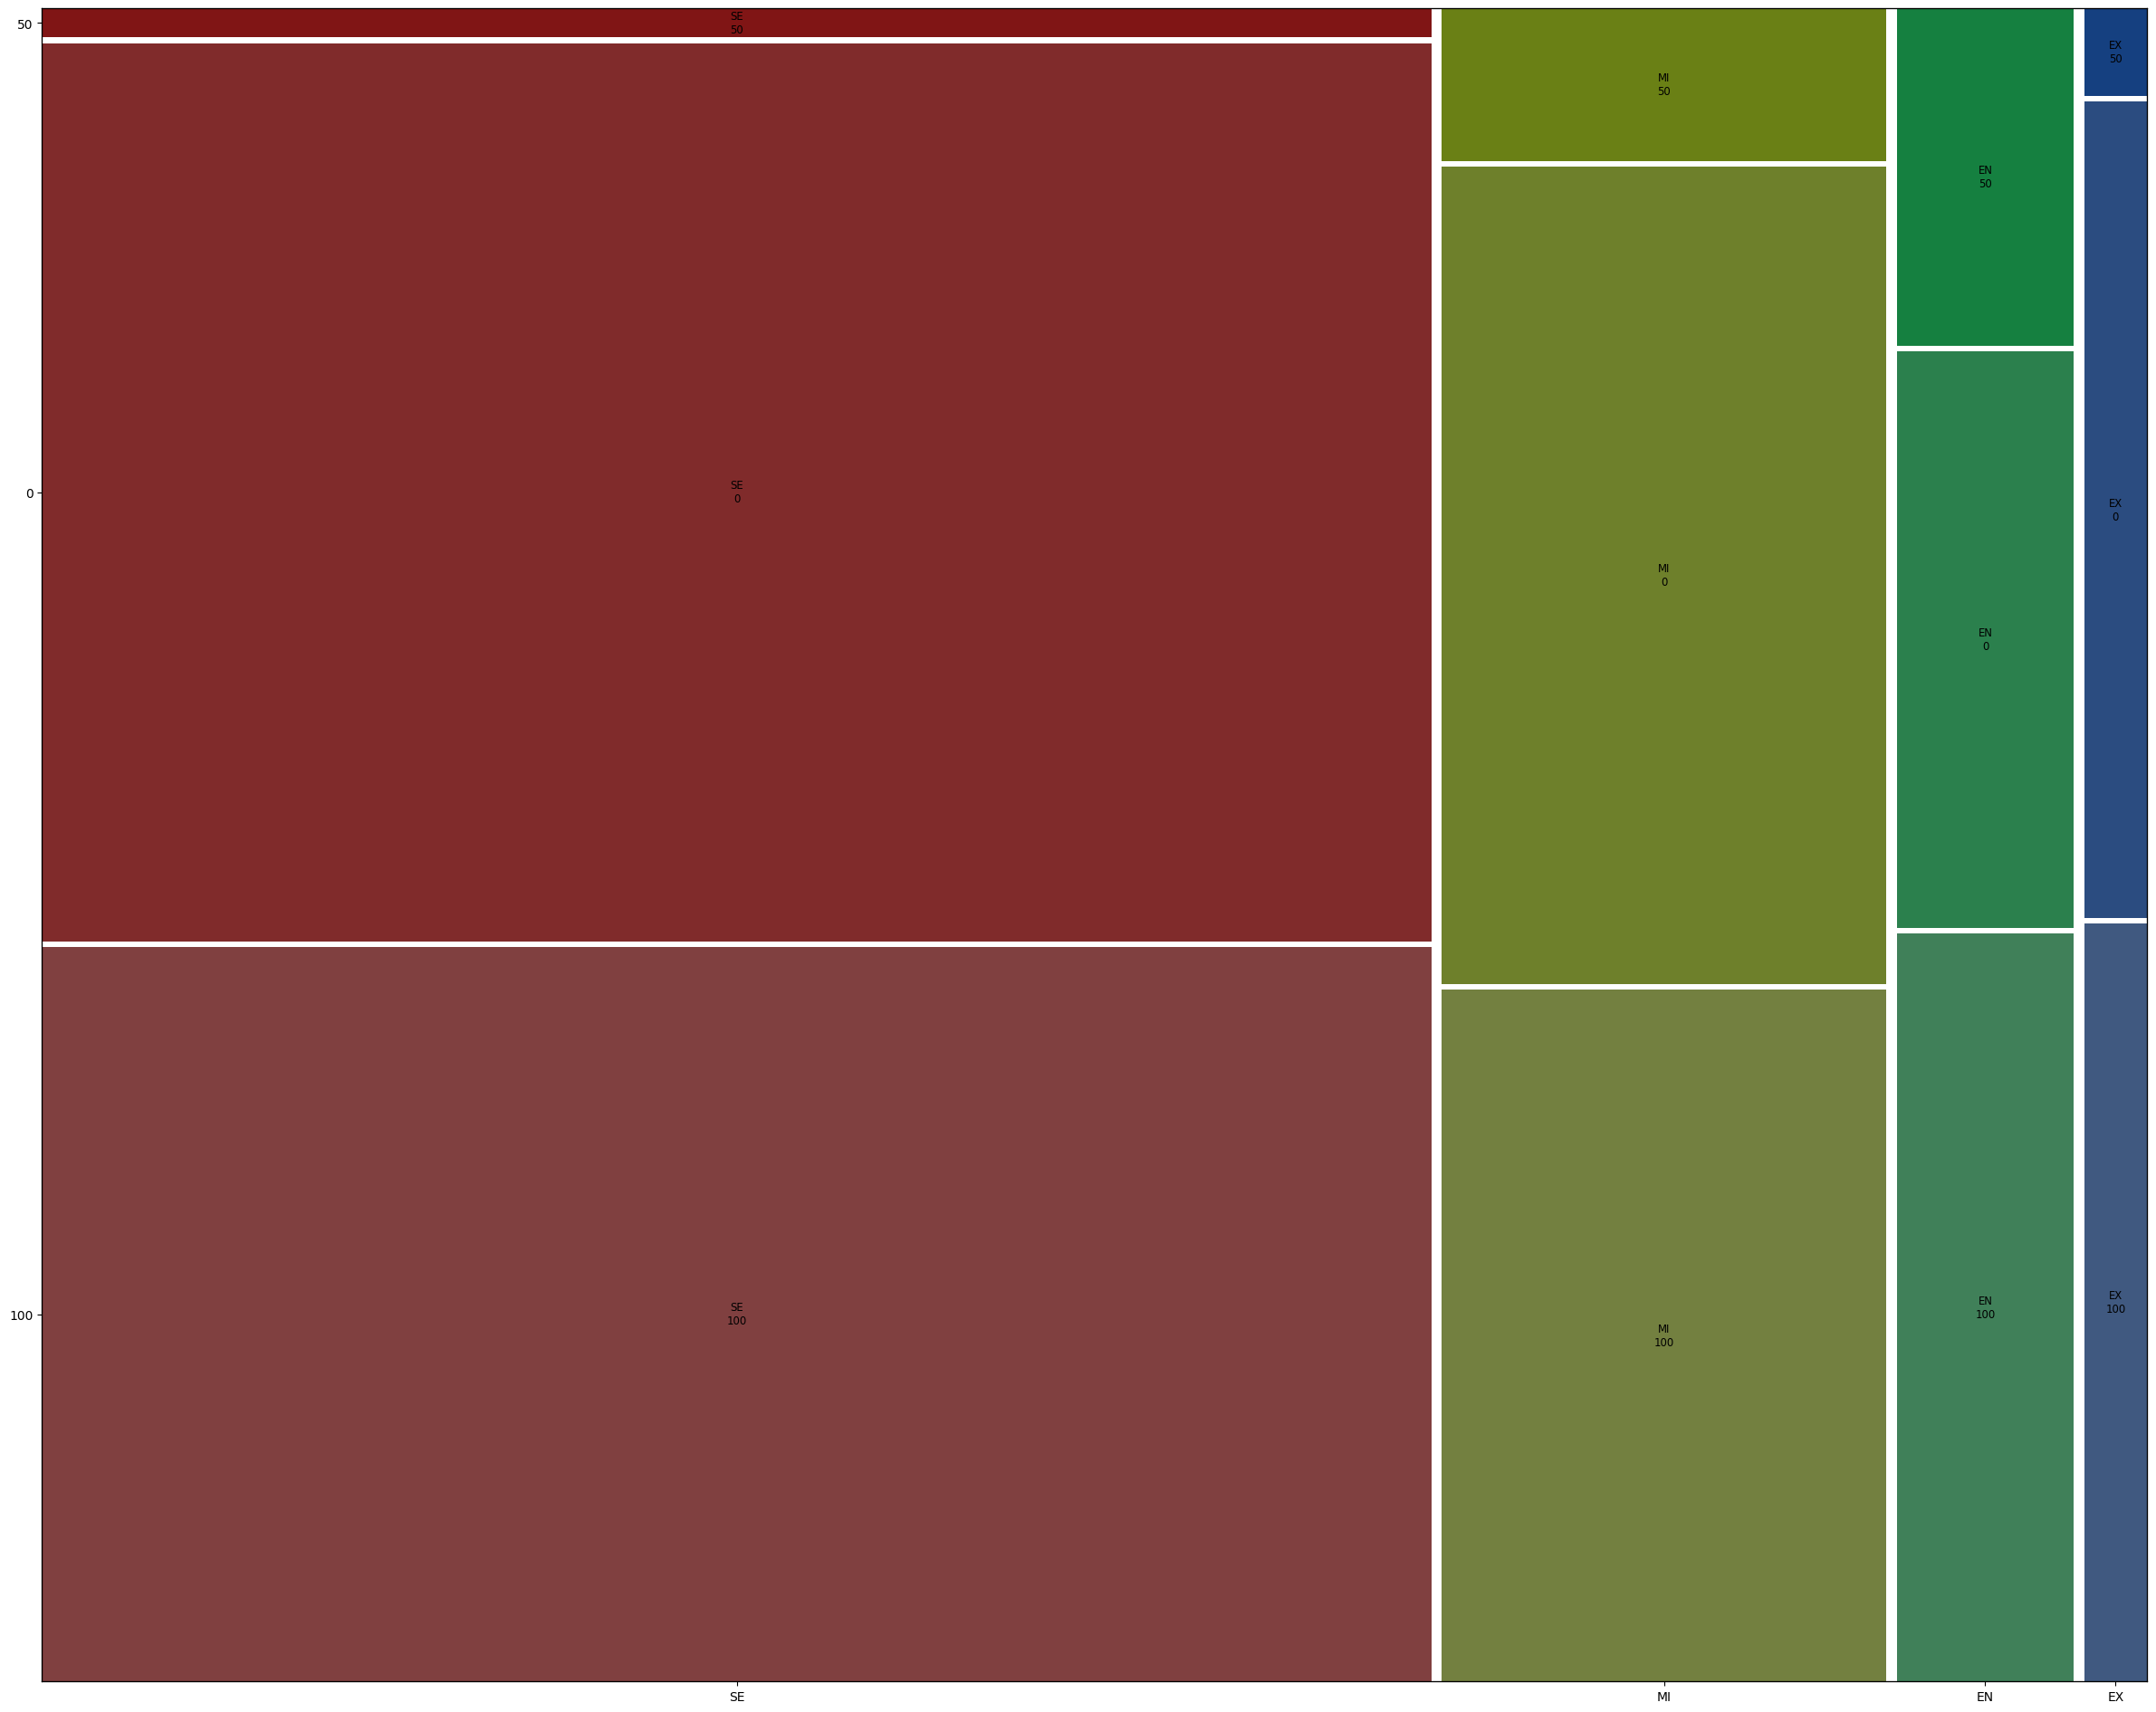

In [128]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
plt.rcParams["figure.figsize"]=(30, 24)
mosaic(df, ['experience_level','remote_ratio'])

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [133]:
#a)
#Your code:
filtered = df.loc[(df['salary_in_usd'] >= 10000) & (df['employee_residence'] != 'US') & (df['company_location'] == 'US')]
filtered.describe()


#Hint: pandas.DataFrame.loc

,work_year,salary,salary_in_usd,remote_ratio
count,40.000000,4.000000e+01,40.000000,40.000000
mean,2021.550000,5.113341e+05,77597.675000,87.500000
std,0.875595,1.847648e+06,54340.089211,27.151049
min,2020.000000,1.200000e+04,12000.000000,0.000000
25%,2021.000000,4.744000e+04,37864.750000,100.000000
50%,2022.000000,6.750000e+04,58000.000000,100.000000
75%,2022.000000,1.356000e+05,101250.000000,100.000000
max,2023.000000,1.100000e+07,200000.000000,100.000000


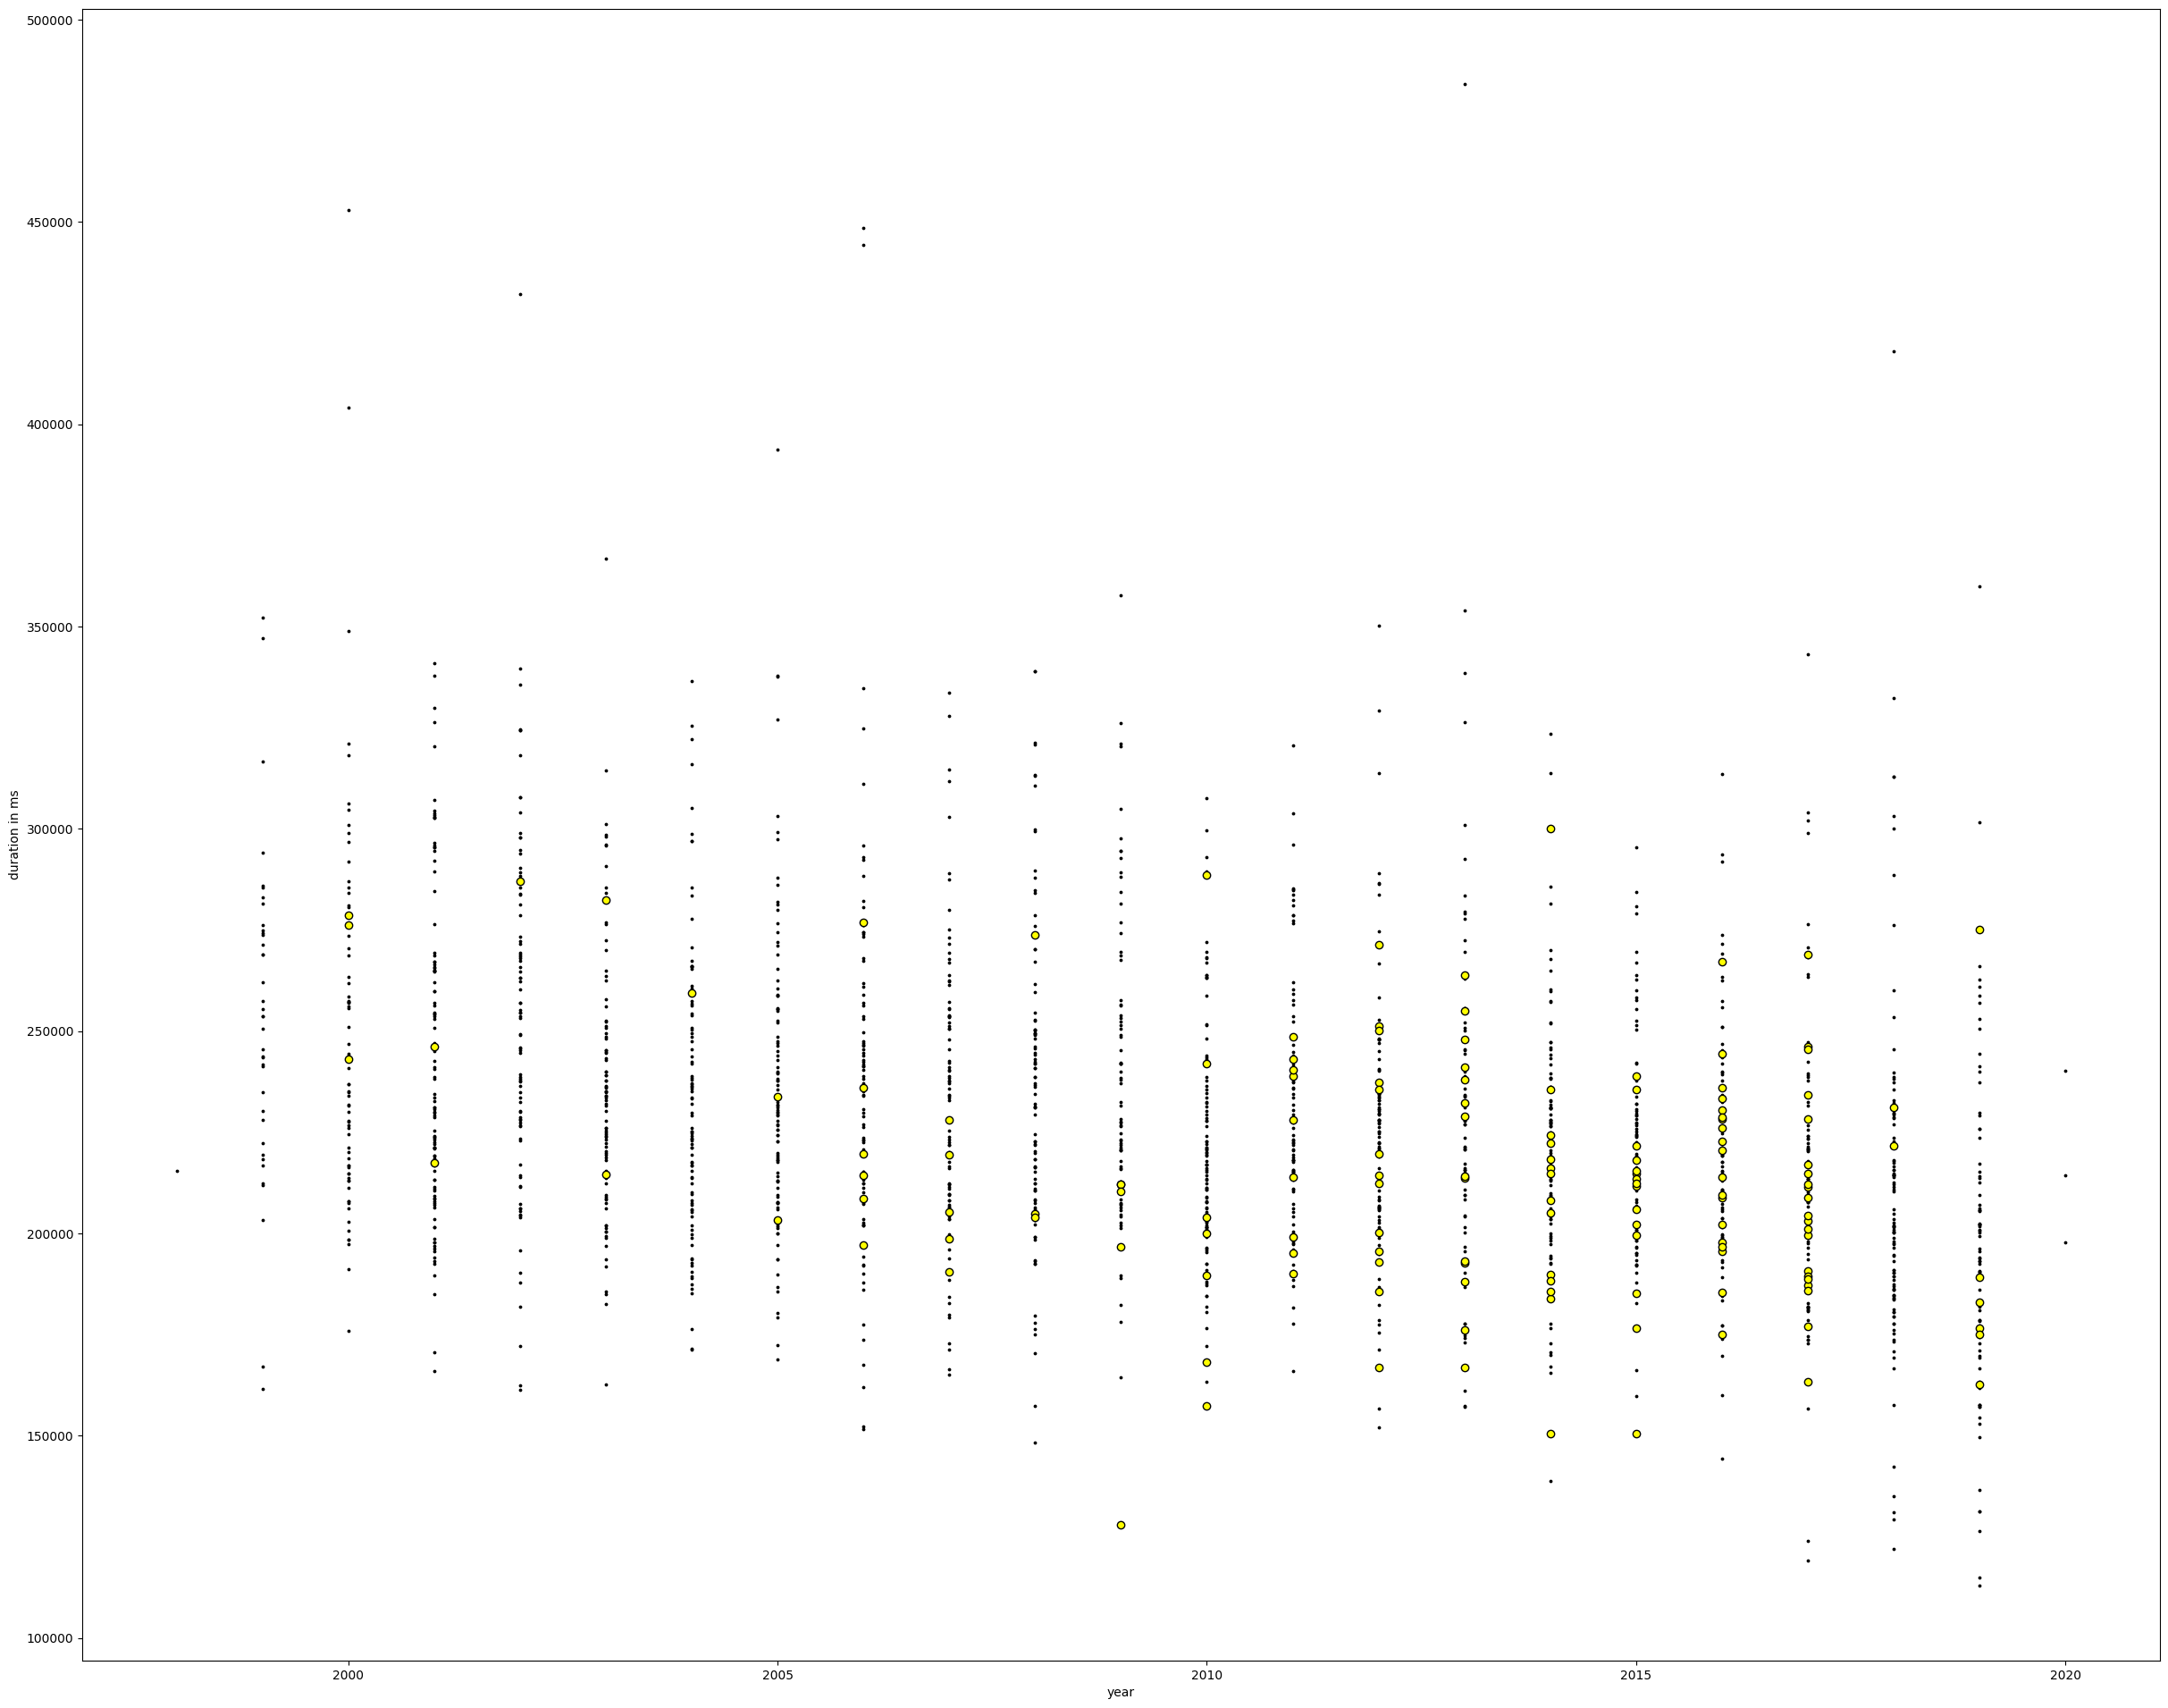

In [ ]:
#b)
#Your code:
fig, ax = plt.subplots()
ax.scatter(df['year'], df['duration_ms'], c='black', s=3)
ax.scatter(filtered['year'], filtered['duration_ms'], c='yellow', edgecolors='black')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("year")
plt.ylabel("duration in ms")
plt.show()

In [ ]:
#c)
#Your code:


def calculate(row):
    return row['loudness'] / row['duration_ms']
filtered['ratio'] = filtered.apply(calculate, axis=1)
filtered = filtered.sort_values(by='ratio')
filtered.head(10)

#Hint: .loc, .sort_values(), .index

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,ratio
937,The xx,Intro,127920,False,2009,2,0.617,0.778,9,-8.871,0,0.0270,0.459000,0.925000,0.1280,0.152,100.363,rock,-0.000069
1358,Storm Queen,Look Right Through - MK Vocal Edit,150400,False,2014,0,0.832,0.815,0,-8.035,0,0.0810,0.003040,0.005530,0.2630,0.519,119.995,Dance/Electronic,-0.000053
1549,Silentó,Watch Me (Whip / Nae Nae),185131,False,2015,0,0.819,0.768,8,-8.522,1,0.1340,0.234000,0.000000,0.3340,0.964,139.982,hip hop,-0.000046
1443,Mr. Probz,Waves - Robin Schulz Radio Edit,208133,False,2014,2,0.829,0.510,5,-9.334,0,0.0369,0.008210,0.001400,0.0829,0.450,119.993,"hip hop, Dance/Electronic",-0.000045
1986,Lauv,i'm so tired...,162582,False,2019,2,0.599,0.733,11,-7.058,1,0.2030,0.176000,0.000000,0.2420,0.534,102.211,"pop, Dance/Electronic",-0.000043
1587,Rich Homie Quan,"Flex (Ooh, Ooh, Ooh)",176674,True,2015,1,0.676,0.615,6,-7.534,0,0.0496,0.038400,0.000000,0.3410,0.883,163.993,"hip hop, pop",-0.000043
1339,Lorde,Team,193058,False,2013,0,0.691,0.582,6,-7.444,1,0.0939,0.162000,0.000000,0.2470,0.427,100.050,"pop, Dance/Electronic",-0.000039
1739,Kendrick Lamar,HUMBLE.,177000,True,2017,0,0.906,0.625,1,-6.779,0,0.0903,0.000243,0.000032,0.0975,0.423,150.018,hip hop,-0.000038
860,Mariah Carey,Touch My Body,204733,False,2008,0,0.715,0.665,4,-7.736,0,0.0502,0.099600,0.000000,0.2240,0.840,78.502,"pop, R&B",-0.000038
1750,Kendrick Lamar,DNA.,185946,True,2017,0,0.636,0.517,0,-6.759,1,0.3600,0.004020,0.000000,0.0874,0.394,139.928,hip hop,-0.000036


In [69]:
fig=px.pie(df, values=df['experience_level'].value_counts().values,
           names=df['experience_level'].value_counts().index, title='Percentage of experience level')
fig.show()